In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import generative_model
import plot
import emcee
import timeit

In [118]:
model = generative_model.GenerativeModel()

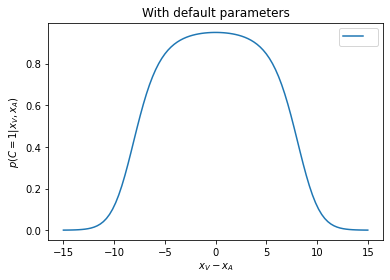

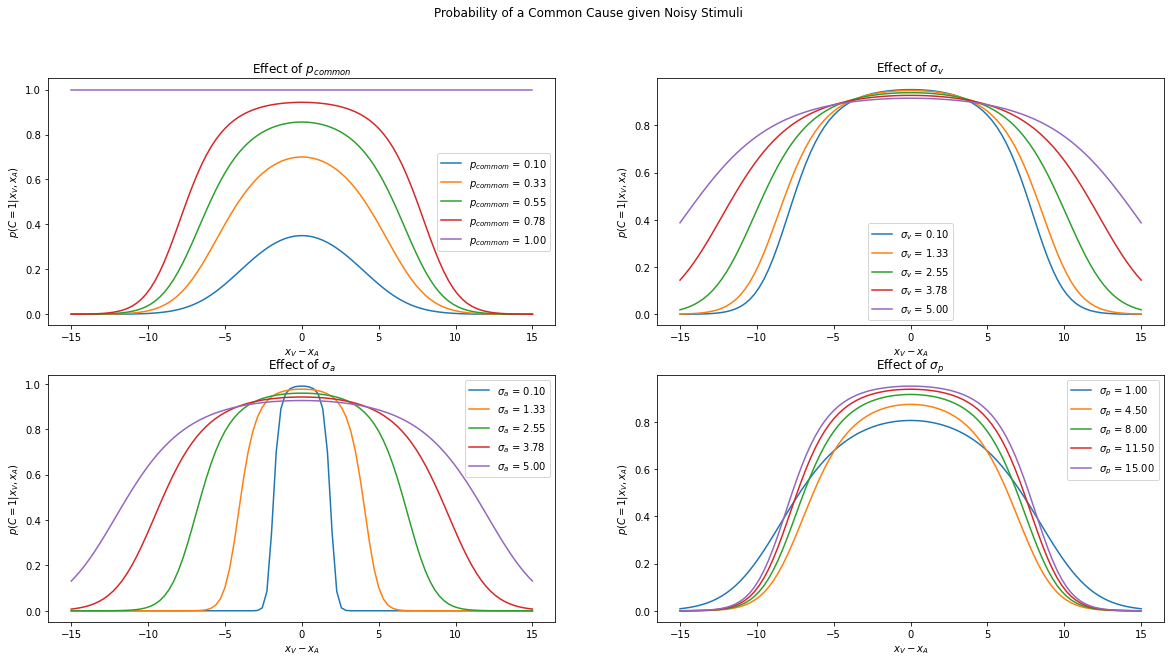

In [119]:
x_v, x_a = np.linspace(-15, 15, 100), 0

plot.plot_figure(x_v-x_a, model.probability_cause(x_v, x_a), '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='With default parameters')
plot.plot_probability_varying_parameters(x_v, x_a, model.probability_cause, '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='Probability of a Common Cause given Noisy Stimuli')

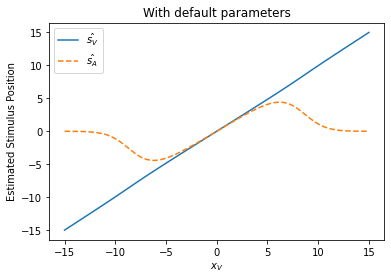

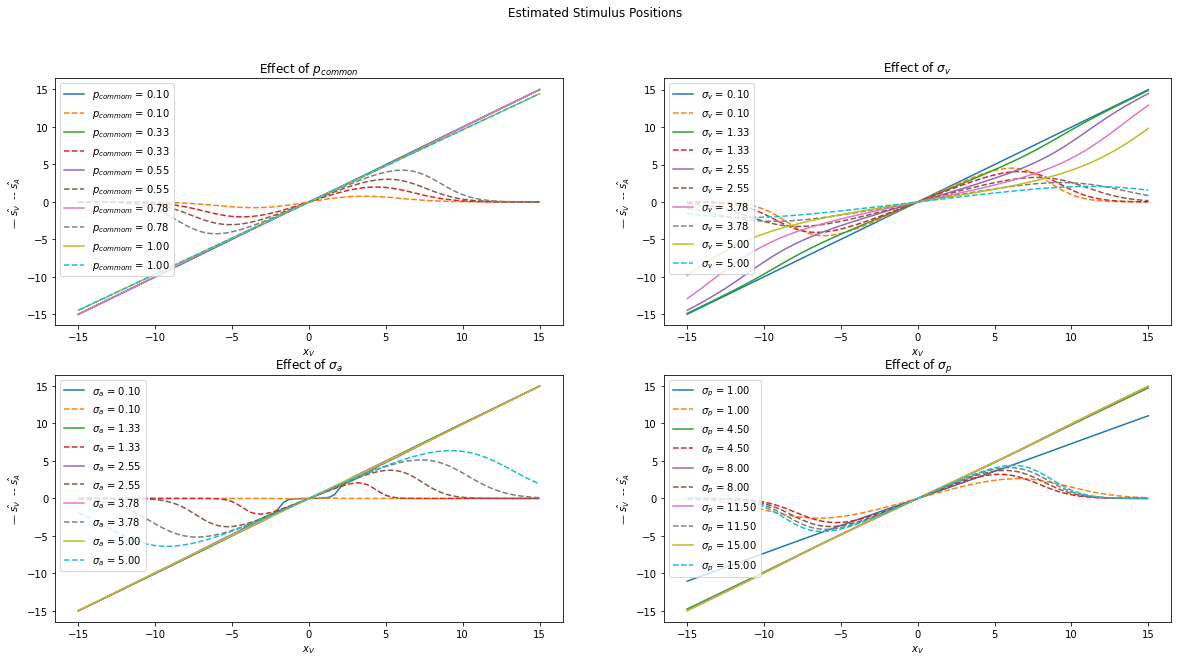

In [120]:
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='video'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_V}$', title='With default parameters')
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='audio'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_A}$', title='With default parameters', fmt='--')

plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='Estimated Stimulus Positions')

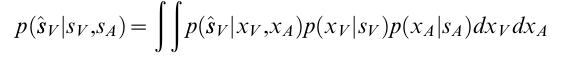

p($\hat{s_V}$|x_V, x_A) is gaussian (think of bayes rule formula).  Hence, the integral is also gaussian (product of gaussians), and hence can be parameterised for analytic evaluation.

In [121]:
#TODO: heatmap for 1.f.

In [122]:
stimulus_pairs, is_common = model.generate_stimulus_pairs(10)
stimulus_pairs, is_common

(array([[ 24.49766836,  24.49766836],
        [ -0.20693049,  18.13087393],
        [ 21.99946842,  21.99946842],
        [ 11.00638718,  16.77147046],
        [ 32.06547104,  32.06547104],
        [ 16.46381594,  12.71160996],
        [ 10.33469496,  -1.10270842],
        [  8.603863  ,   8.603863  ],
        [-11.06516241, -11.06516241],
        [ -5.83145884,  -4.42685512]]),
 array([ True, False,  True, False,  True, False, False,  True,  True,
        False]))

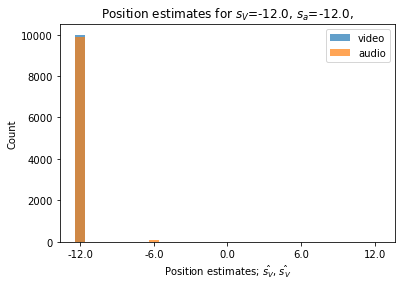

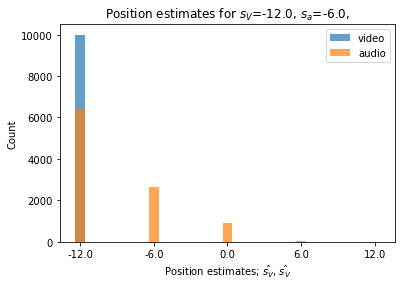

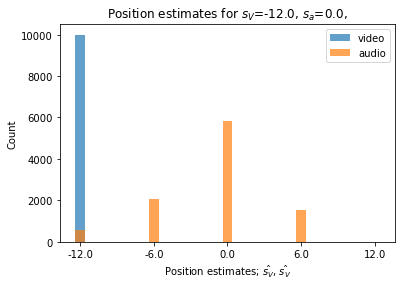

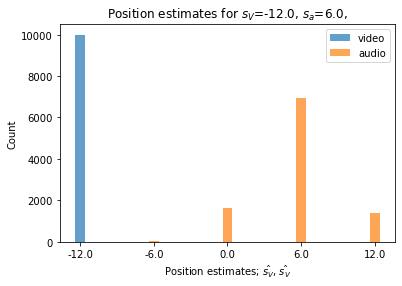

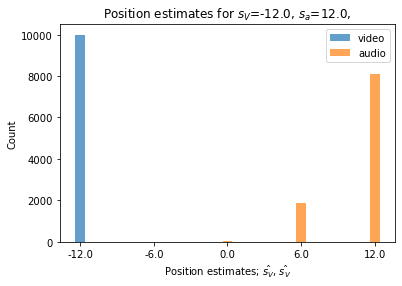

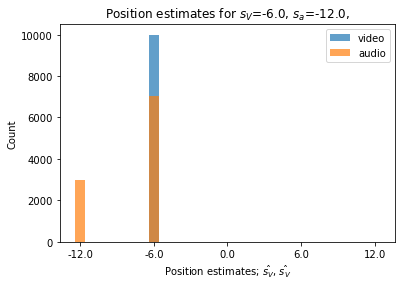

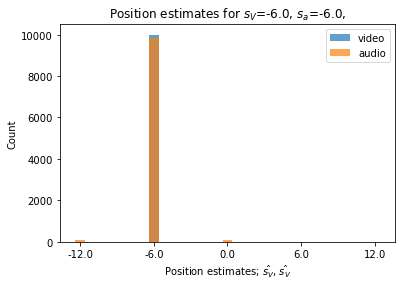

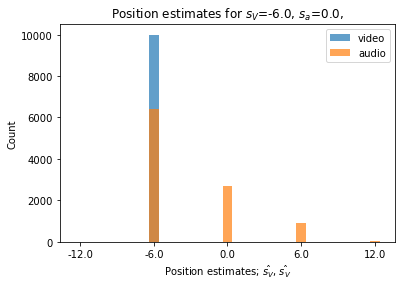

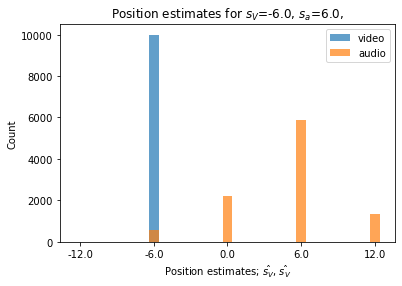

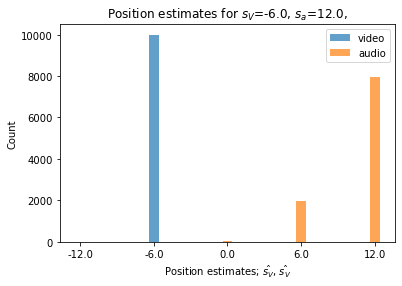

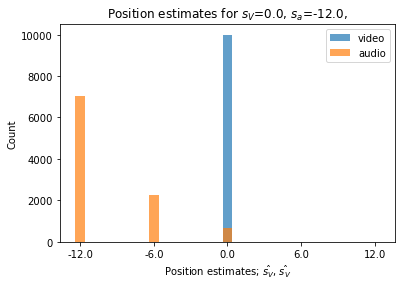

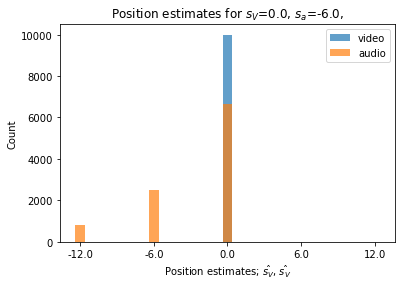

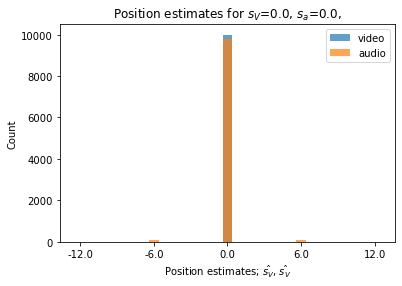

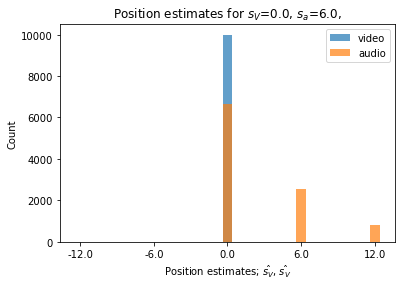

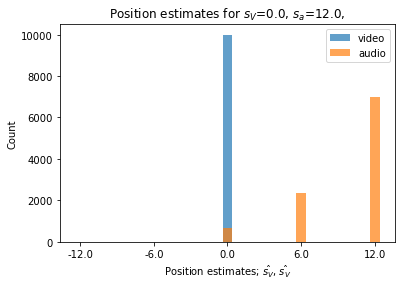

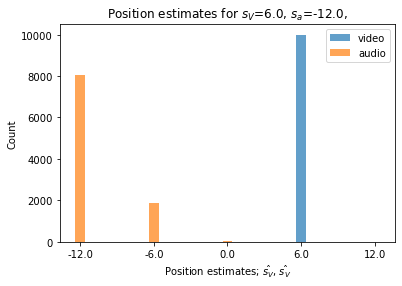

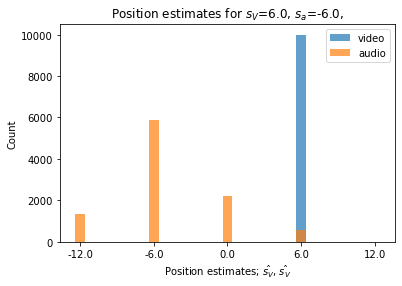

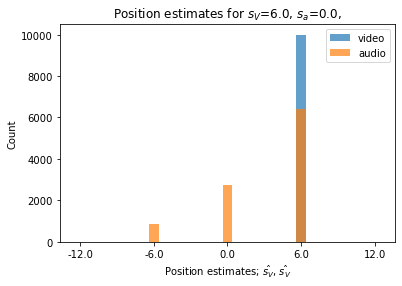

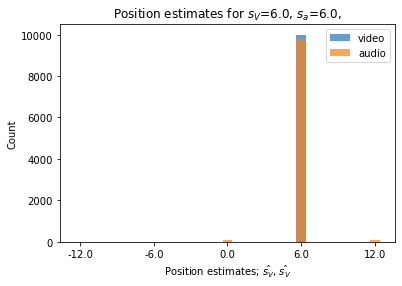

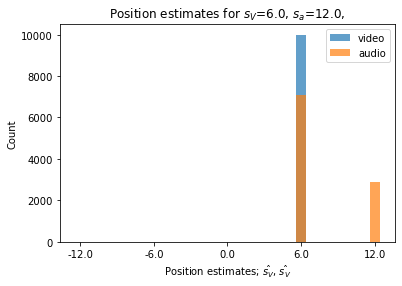

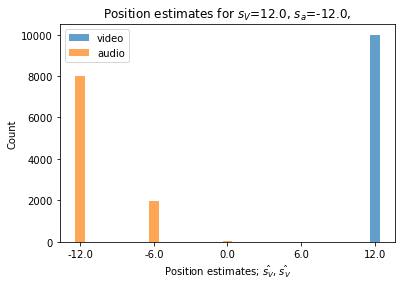

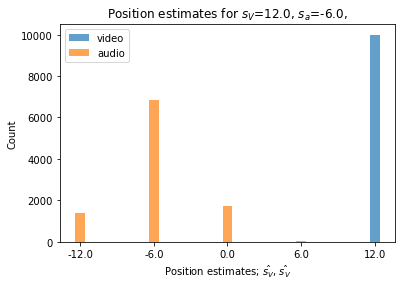

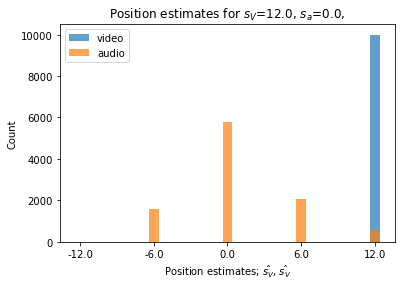

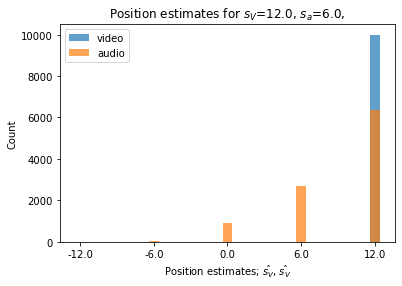

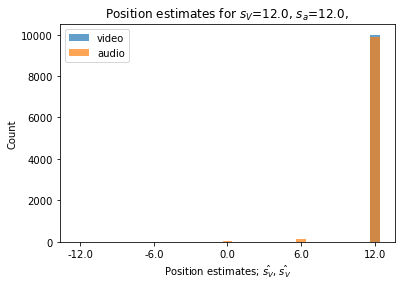

(10000,
 array([[ 24.49766836,  24.49766836],
        [ -0.20693049,  18.13087393],
        [ 21.99946842,  21.99946842],
        [ 11.00638718,  16.77147046],
        [ 32.06547104,  32.06547104],
        [ 16.46381594,  12.71160996],
        [ 10.33469496,  -1.10270842],
        [  8.603863  ,   8.603863  ],
        [-11.06516241, -11.06516241],
        [ -5.83145884,  -4.42685512]]))

In [123]:
trials = int(1e4)
s_hat_v_hist, s_hat_a_hist = model.make_button_presses(trials)
trials, stimulus_pairs

In [124]:
# trials, stimulus_pairs

In [125]:
np.sum(s_hat_v_hist,axis=0)/np.sum(s_hat_v_hist)

array([0.193206, 0.205196, 0.203004, 0.205916, 0.192678])

In [126]:
#model data
s_hat_v_hist_model, s_hat_a_hist_model = model.make_button_presses(trials*10, plot=False)

In [127]:
n_a = np.sum(s_hat_v_hist) # observed response counts, per auditory condition
n_v = np.sum(s_hat_a_hist) # ... and visual condition

p_a = np.sum(s_hat_v_hist_model)/(np.sum(s_hat_v_hist_model)+np.sum(s_hat_a_hist_model)) # probability of button press for each auditory bin
p_v = np.sum(s_hat_a_hist_model)/(np.sum(s_hat_v_hist_model)+np.sum(s_hat_a_hist_model)) #

### 2d

In [128]:
model.log_likelihood()

(array([[0.19271155, 0.19271155],
        [0.20549419, 0.20549419],
        [0.20306604, 0.20306604],
        [0.20584419, 0.20584419],
        [0.19280354, 0.19280354]]),
 1.9998390175015217)

### 2f

In [112]:
start = timeit.timeit()
likelihoods = model.brute_fitting()
end = timeit.timeit()

print(end - start)

C:\Users\marti\Desktop\2020_2021\Clases\2nd_Semester\MHBF\Programming\Project\causal-inference\generative_model.py:133: RuntimeWarning: invalid value encountered in true_divide
  probability_common_cause = (probability_common * p_common) / (


1.9990789661628015
1.999839061208622
1.9998390612086316
1.9998390612086316
1.9998390612086316
1.9998390612086316
1.9998390612086316
1.9998390612086314
1.9998390612086316
1.9998390612086316
1.9990789661628015
1.9998284836950038
1.9998378016504672
1.999838837655711
1.9998389927747067
1.9998390336094647
1.9998390472083223
1.9998390531130992
1.9998390568149222
1.999839058567766
1.9990789661628015
1.999814472937275
1.9998304988971278


KeyboardInterrupt: 

### 2g

In [108]:
## Needs a couple of adjustements yet to perform the MCMC

array([-2.11693575, -2.10784102, -2.02950917, -2.03179489, -2.07465302,
       -2.06042354, -2.12026354, -2.09882826])